Calculates wrap error for each pixel by loading sequential and skip1 igrams, then differencing them after removing their modes. 
<br><br>
Written 10-17-23 to reproduce the wrap_err.i1 file that Rowena had made.
***
***

In [1]:
# import stuff
import os,sys
import glob
from osgeo import gdal
import datetime 
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
%matplotlib  widget

Load Rowena's version of the wrap error map to compare to mine. 

In [2]:
loadDir = '/data/ocp4/LagunaSalada/Data_and_Figs/cropped_9000_1800_18000_3600/cropped_LS_with_western_mtns/'
file_name = 'unfilt_unwrapped/wrap_err.i1' 
f1 = gdal.Open(loadDir+file_name, gdal.GA_ReadOnly)
wrap_err_Ro = f1.ReadAsArray(); f1 = None
print('wrap errors for each pixel loaded.')

wrap errors for each pixel loaded.


Load in seq igrams AB, BC, and skip1 igram AC to calculate corrected triplet/loop/wrap error, add it to a cumulative wrap_err array.

In [15]:
# igramsDir is where the cropped, unwrapped igrams are 
igramsDir = '/data/ocp4/LagunaSalada/Data_and_Figs/cropped_9000_1800_18000_3600/cropped_LS_with_western_mtns/unfilt_unwrapped/'
#igramsDir = '/data/ocp4/LagunaSalada/Data_and_Figs/cropped_9000_1800_18000_3600/cropped_LS_with_western_mtns/unfilt_unwrapped/JiangLohmanTest/'

# this one is to pick out the dates 
datesDir = '/data/ocp4/LagunaSalada/Data_and_Figs/cropped_9000_1800_18000_3600/'

# shape of unwrapped igrams
dx = 4000
dy = 1100

# load in dates, make sure they are in order
dates = [os.path.basename(x) for x in glob.glob(datesDir+"SLC_vh/2*")]; dates = sorted(dates)
nd = len(dates); numIgrams = nd-1

# this will accumulate wrap errors as each triplet is loaded in 
wrap_err = np.zeros((dy,dx))

# loop through the dates 
for i in range(numIgrams-1): # 211 SLCs, 210 igrams, 209 triplets
    dateA=dates[i]
    dateB=dates[i+1]
    dateC=dates[i+2]
    # seq igram AB
    igramAB = igramsDir+dateA+'_'+dateB+'_unfilt.unw'
    ds = gdal.Open(igramAB,gdal.GA_ReadOnly)
    phsAB = ds.GetRasterBand(1).ReadAsArray(0,0,dx,dy)
    # seq igram BC
    igramBC = igramsDir+dateB+'_'+dateC+'_unfilt.unw'
    ds = gdal.Open(igramBC,gdal.GA_ReadOnly)
    phsBC = ds.GetRasterBand(1).ReadAsArray(0,0,dx,dy)
    # skip1 igram AC
    igramAC = igramsDir+dateA+'_'+dateC+'_unfilt.unw'
    ds = gdal.Open(igramAC,gdal.GA_ReadOnly)
    phsAC = ds.GetRasterBand(1).ReadAsArray(0,0,dx,dy)
    # calculate wrap error for that triplet and add it
    #print(np.rint(np.median(phsAC)/(2*np.pi)))
    correction = np.rint(np.median(phsAB + phsBC)) - np.rint(np.median(phsAC))
    wrap_err += np.abs(np.rint((phsAB + phsBC - phsAC - correction)/(2*np.pi)))


    #This was for troubleshooting 
    # plt.figure(figsize=(8,12),tight_layout=True)
    # plt.subplot(3,2,1)
    # plt.imshow(phsAB, aspect='auto',interpolation='nearest')
    # plt.colorbar(orientation='vertical',pad=0.02,label='phs')
    # plt.xlim([dx,0]); plt.ylim([dy,0]); plt.xticks([]); plt.yticks([])
    # plt.title('AB')
    # plt.subplot(3,2,2)
    # plt.imshow(phsBC, aspect='auto',interpolation='nearest')
    # plt.colorbar(orientation='vertical',pad=0.02,label='phs')
    # plt.xlim([dx,0]); plt.ylim([dy,0]); plt.xticks([]); plt.yticks([])
    # plt.title('BC')
    # plt.subplot(3,2,3)
    # plt.imshow(phsAC, aspect='auto',interpolation='nearest')
    # plt.colorbar(orientation='vertical',pad=0.02,label='phs')
    # plt.xlim([dx,0]); plt.ylim([dy,0]); plt.xticks([]); plt.yticks([])
    # plt.title('AC')
    # plt.subplot(3,2,4)
    # plt.imshow(phsAB + phsBC - phsAC, aspect='auto',interpolation='nearest')
    # plt.colorbar(orientation='vertical',pad=0.02,label='phs')
    # plt.xlim([dx,0]); plt.ylim([dy,0]); plt.xticks([]); plt.yticks([])
    # plt.title('AB+BC-AC')
    # plt.subplot(3,2,5)
    # plt.imshow(wrap_err, aspect='auto',interpolation='nearest')
    # plt.colorbar(orientation='vertical',pad=0.02,label='cumulative wrapping errors, number of 2pi jumps')
    # plt.xlim([dx,0]); plt.ylim([dy,0]); plt.xticks([]); plt.yticks([])
    # plt.title('wrap_err of triplet ABC')
    # plt.show()

1.0
0.0
1.0
0.0
-0.0
1.0
1.0
-0.0
1.0
1.0
0.0
1.0
0.0
0.0
1.0
1.0
1.0
-0.0
0.0
1.0
0.0
0.0
1.0
0.0
0.0
-0.0
1.0
0.0
1.0
0.0
0.0
0.0
-0.0
-0.0
1.0
2.0
0.0
-1.0
1.0
2.0
0.0
0.0
1.0
1.0
0.0
1.0
-0.0
0.0
0.0
1.0
0.0
0.0
1.0
0.0
1.0
0.0
-0.0
0.0
1.0
1.0
0.0
-0.0
1.0
1.0
0.0
0.0
-0.0
0.0
1.0
-1.0
0.0
2.0
1.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
1.0
0.0
1.0
1.0
0.0
-0.0
-0.0
1.0
0.0
1.0
1.0
1.0
0.0
0.0
0.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
0.0
0.0
0.0
1.0
1.0
1.0
1.0
1.0
0.0
0.0
1.0
1.0
1.0
1.0
-0.0
1.0
1.0
1.0
0.0
-1.0
1.0
1.0
1.0
1.0
1.0
1.0
-0.0
0.0
1.0
0.0
0.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
-0.0
0.0
1.0
1.0
1.0
0.0
0.0
0.0
0.0
1.0
1.0
0.0
1.0
1.0
0.0
1.0
1.0
0.0
1.0
0.0
0.0
0.0
-0.0
0.0
1.0
-0.0
0.0
1.0
1.0
1.0
1.0
-0.0
0.0
0.0
1.0
1.0
1.0
1.0
-0.0
1.0
1.0
-0.0
1.0
0.0
1.0
0.0
0.0
-0.0
1.0
0.0
1.0
1.0
-0.0
1.0
0.0
0.0
0.0
-0.0
1.0
1.0
0.0
0.0
1.0
1.0
0.0
0.0


Plot Rowena's wrap error map.

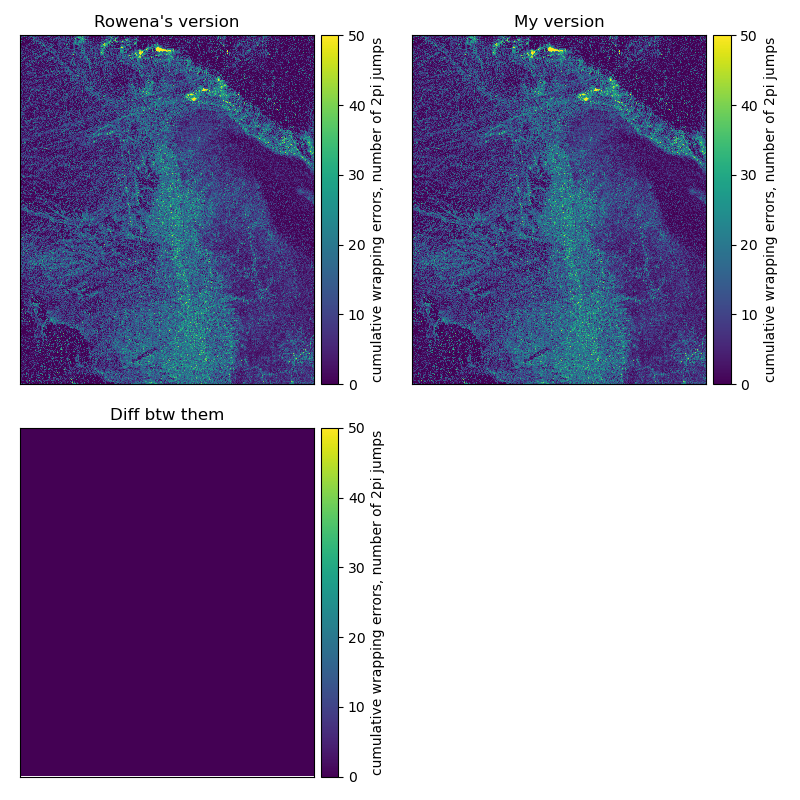

In [16]:
plt.figure(figsize=(8,8),tight_layout=True)
plt.subplot(2,2,1)
plt.imshow(wrap_err_Ro, aspect='auto',interpolation='nearest',vmin=0,vmax=50)
plt.colorbar(orientation='vertical',pad=0.02,label='cumulative wrapping errors, number of 2pi jumps')
plt.xlim([dx,0]); plt.ylim([dy,0]); plt.xticks([]); plt.yticks([])
plt.title('Rowena\'s version')
plt.subplot(2,2,2)
plt.imshow(wrap_err, aspect='auto',interpolation='nearest',vmin=0,vmax=50)
plt.colorbar(orientation='vertical',pad=0.02,label='cumulative wrapping errors, number of 2pi jumps')
plt.xlim([dx,0]); plt.ylim([dy,0]); plt.xticks([]); plt.yticks([])
plt.title('My version')
plt.subplot(2,2,3)
plt.imshow(wrap_err_Ro-wrap_err, aspect='auto',interpolation='nearest',vmin=0,vmax=50)
plt.colorbar(orientation='vertical',pad=0.02,label='cumulative wrapping errors, number of 2pi jumps')
plt.xlim([dx,0]); plt.ylim([dy,0]); plt.xticks([]); plt.yticks([])
plt.title('Diff btw them')
plt.show()

Save it. Only run once.

In [17]:
driver=gdal.GetDriverByName('ISCE')
#fileName = '/data/ocp4/LagunaSalada/Data_and_Figs/cropped_9000_1800_18000_3600/cropped_LS_with_western_mtns/wrap_err.r4'
fileName = '/data/ocp4/LagunaSalada/Data_and_Figs/cropped_9000_1800_18000_3600/cropped_LS_with_western_mtns/wrap_err_v2.r4' # Jiang and Lohman, 2021 method
colds = driver.Create(fileName,dx,dy,1,gdal.GDT_Float32)
colds.GetRasterBand(1).WriteArray(wrap_err)
colds=None
print('Wrap error file saved.')

Wrap error file saved.
